# Regressão Linear para Inferencia

Carregando bibliotecas

In [1]:
!pip install wooldridge

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 34.7 MB/s eta 0:00:00


In [7]:
import pandas as pd
from wooldridge import *
import statsmodels.formula.api as smf

- sat: pontuação SAT combinada(antes da faculdade)
- tothrs: total de horas até o semestre de outono
- colgpa: GPA após o semestre de outono(nota no faculdade)
- atleta: =1 se atleta
- verbmath: pontuação SAT verbal/matemática
- hsize: graduação de tamanho. classe, 100s
- hsrank: classificação na graduação. aula
- hsperc: percentil do ensino médio, do topo
- feminino: =1 se feminino
- branco: =1 se branco
- preto: =1 se preto
- hsizesq: hsize^2

In [8]:
# Carregando dados
gpa = dataWoo('gpa2')
gpa.head()

,sat,tothrs,colgpa,athlete,verbmath,hsize,hsrank,hsperc,female,white,black,hsizesq
0,920,43,2.04,1,0.48387,0.10,4,40.000000,1,0,0,0.010000
1,1170,18,4.00,0,0.82813,9.40,191,20.319149,0,1,0,88.360001
2,810,14,1.78,1,0.88372,1.19,42,35.294117,0,1,0,1.416100
3,940,40,2.42,0,0.80769,5.71,252,44.133099,0,1,0,32.604099
4,1180,18,2.61,0,0.73529,2.14,86,40.186916,0,1,0,4.579600


Vamos verificar como a posição do aluno durante o colégio (hsperc) e sua nota do SAT se relacionam com seu GPA. Queremos entender se existe relação entre desempenho na adolescência tem relação com desempenho na faculdade, se o aluno ter ido bem na escola e no "vestibular" tem relação com desempenho na universidade. Ou seja, queremos estimar a seguinte equação:

In [9]:
# ~ significa =, ou seja, vamos fazer uma relação de explicar o GPA(nota na faculdade) a partir do hsperc e SAT, ambos antes da faculdade
results = smf.ols('colgpa ~ hsperc + sat', data=gpa).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     777.9
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          1.77e-287
Time:                        13:35:03   Log-Likelihood:                -3481.3
No. Observations:                4137   AIC:                             6969.
Df Residuals:                    4134   BIC:                             6988.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3918      0.072     19.454      0.0

Olhando para a coluna COEF, podemos identificar os coeficientes das variaveis

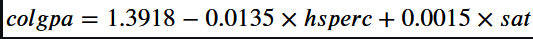

Avalidando a regressão
- P valor: Este p-valor indica a probabilidade de obter um resultado igual ou mais extremo do que o observado a partir do acaso ou testes de reamostragem, assumindo que a hipótese nula seja verdadeira. o P valor ser superior a 0.05 indica que a hipotese nula está verdadeia, ou seja, nossos coeficientes são o mesmo que 0. Como nossos p's foram todos 0, siginifcia que nao foi possivel obter um resultaso igual ao extremo observavel e negamos a hipotese nula
- R-quadrado: é uma das métricas mais importantes quando estamos falando de inferência. é uma medida estatística usada para avaliar a qualidade de ajuste do nosso modelo. Ele varia entre 0 e 1 e descreve a porcentagem da variância da variável dependente que as variáveis independentes explicam coletivamente, ou seja, **QUANTO DO TARGET É EXPLICADO**
- AVALIANDO O MODELO COMO UM TODO: F-Statistic: Significância do modelo. A estatística F é uma medida estatística utilizada na análise de regressão linear para avaliar a significância global do modelo

# Avaliando uma regressão linear

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('DataBase\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


A variavel que queremos prever é a charges, a respeito de gastos com saude

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.shape

(1338, 7)

<Axes: xlabel='charges', ylabel='Count'>

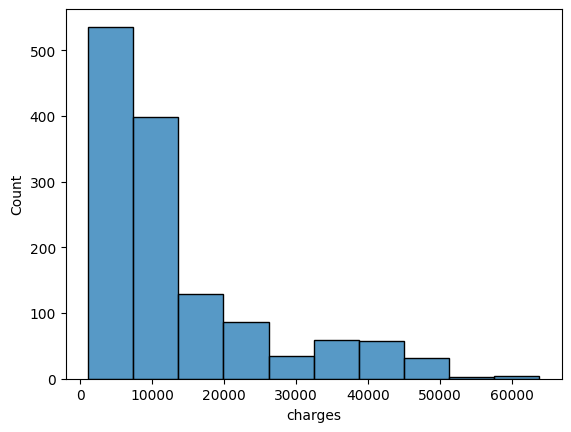

In [21]:
import seaborn as sns

sns.histplot(data=df, x='charges', bins=10, kde=False)

Dividindo os dados em treino e teste e separando as variaveis categoricas e numericas

In [43]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((1070, 6), (268, 6))

Nesse caso como todas as colunas que tem o tipo primitivo como numerico podem ser consideradas variaveis numericas, podemos separas as features da seguinte forma:

In [44]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

categorical_features, numerical_features

(['sex', 'smoker', 'region'], ['age', 'bmi', 'children'])

Criando o pipeline de preprocessamento

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler

# Pipe line tanto para as features numericas e categorical
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ecoder', OneHotEncoder(drop='first'))
])

transformer = ColumnTransformer([
    ('categorical_transformer', categorical_pipe, categorical_features),
    ('numerical_trasformer', numerical_pipe, numerical_features)
])

Modelagem

In [56]:
from sklearn.pipeline import Pipeline
import lightgbm as lgb

model = Pipeline([
    ('preprocessor', transformer),
    ('regressor', lgb.LGBMRegressor(force_col_wise=True, random_state=42))
])

Validando o modelo


In [57]:
import numpy as np
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error, 
    mean_absolute_percentage_error

)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'mse: {mse:.2f}')
print(f'rmse: {rmse:.2f}')
print(f'mape: {mape:.2f}')

[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 13346.089733
MAE: 2608.68
mse: 20815018.32
rmse: 4562.35
mape: 0.34


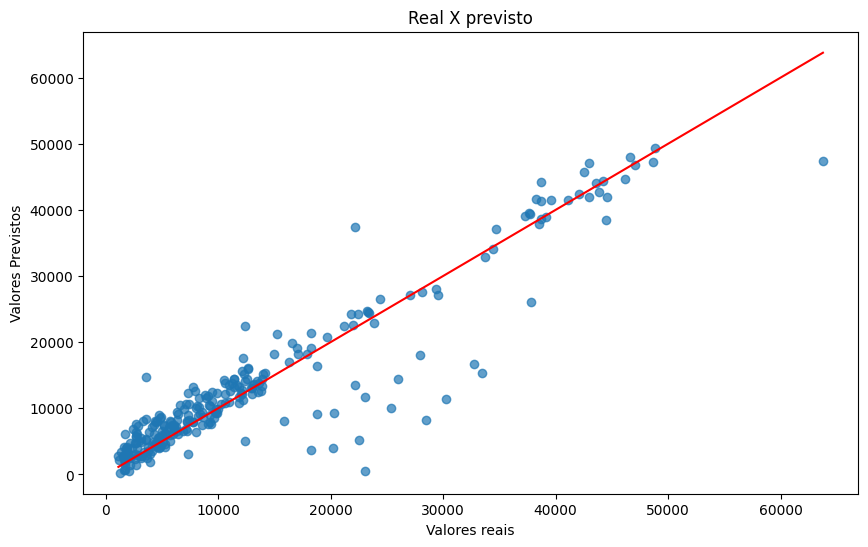

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Valores reais')
plt.ylabel('Valores Previstos')
plt.title('Real X previsto')
plt.show()

Testando aplicação da função logaritimo no target para reduzir assimetria nos dados

In [33]:
model.fit(X_train, np.log(y_train))

y_pred = model.predict(X_test)

mae = mean_absolute_error(np.log(y_test), y_pred)
mse = mean_squared_error(np.log(y_test), y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(np.log(y_test), y_pred)

print(f'MAE: {mae:.2f}')
print(f'mse: {mse:.2f}')
print(f'rmse: {rmse:.2f}')
print(f'mape: {mape:.2f}')

[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 9.113322
MAE: 0.21
mse: 0.14
rmse: 0.38
mape: 0.02


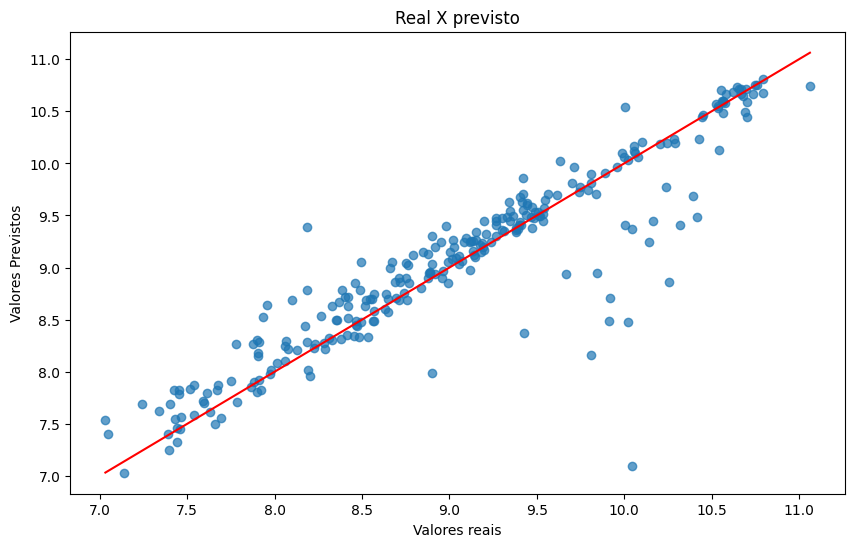

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(np.log(y_test), y_pred, alpha=0.7)
plt.plot([min(np.log(y_test)), max(np.log(y_test))], [min(np.log(y_test)), max(np.log(y_test))], color='red')
plt.xlabel('Valores reais')
plt.ylabel('Valores Previstos')
plt.title('Real X previsto')
plt.show()

Aparentemente temos uma curva mais simetrica

Analisando a correlação entre features e target

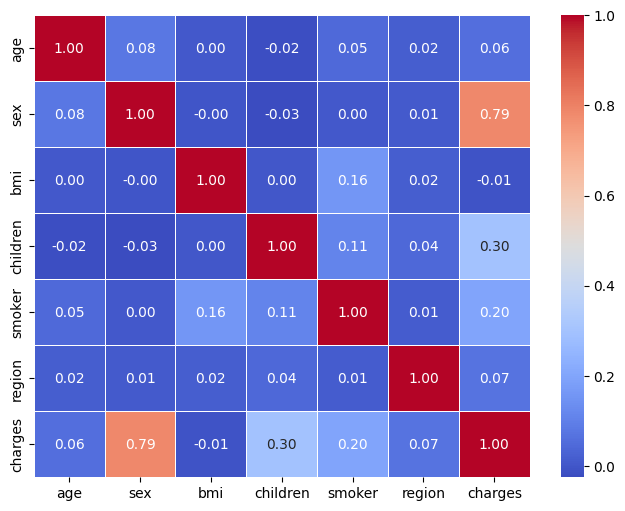

In [41]:
from sklearn.preprocessing import OrdinalEncoder

# Criando o ColumnTransformer
ordinalTransformer = ColumnTransformer(
    transformers=[
        ('ordinal_encoder', OrdinalEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Mantém as colunas não especificadas inalteradas
)

X_transformed = ordinalTransformer.fit_transform(X)

X_transformed_df = pd.DataFrame(X_transformed, columns=X.columns)

corr_df = pd.concat([X_transformed_df, y], axis=1)
correlation_matrix = corr_df.corr()

# Criando o mapa de calor usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()

Aparentemente temos poucas correlações entre as features e o target, vamos tentar aplixar polynomial featurees para tentar achar algumas relação lineartes

- Depois de testes não foram obtidos resultados positivos

# Modelos Ensemble

## Importações e carregamento dos dados

In [31]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder, CatBoostEncoder, WOEEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
hr_data = pd.read_csv('DataBase\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Preprocessamento

Nossa variavel target é Attrition, a primeira coisa que temos que fazer é transforma-la em numerica

In [5]:
hr_data["Attrition"] = hr_data.Attrition.map({"No":0, "Yes":1})

Nesse caso temos 35 colunas, então não podemos separar manualmente as features numericas e categoricas, vamos analisa-las

In [6]:
hr_data.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [7]:
X = hr_data.drop('Attrition', axis=1)
y = hr_data['Attrition']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

In [48]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median')),
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False))
    ])

categorical_transformer = Pipeline(steps=[
    ("encoder", TargetEncoder())
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)                                      

In [50]:
X_train_transformed = preprocessor.fit_transform(X_train, y_train)
X_test_transformed = preprocessor.transform(X_test)

## Bagging

In [51]:
from sklearn.ensemble import RandomForestClassifier

bagging_model = RandomForestClassifier(n_estimators=50) # numero de arvores na floresta

bagging_model.fit(X_train_transformed, y_train)
y_pred = bagging_model.predict(X_test_transformed)

In [20]:
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(f"Acc: {accuracy_score(y_test, y_pred)}")

Precision: 0.4
Recall: 0.05128205128205128
F1: 0.09090909090909091
Acc: 0.8639455782312925


O motivo da acuracia dar tao alta e o recall tao baixo provavelmente vem do fato dos dados estarem desbalanceados, tendo muito mais registros 0 do que 1

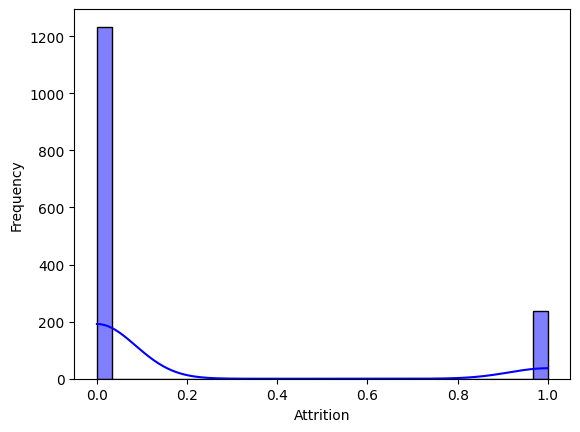

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=hr_data, x="Attrition", bins=30, kde=True, color='blue')
# Adicionando rótulos e título
plt.xlabel('Attrition')
plt.ylabel('Frequency')

# Mostrando o gráfico
plt.show()

Para melhorar o desbalanceamento de dados, vamos analisar o nivel de certeza para as classes

c:\Users\vitor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vitor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vitor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

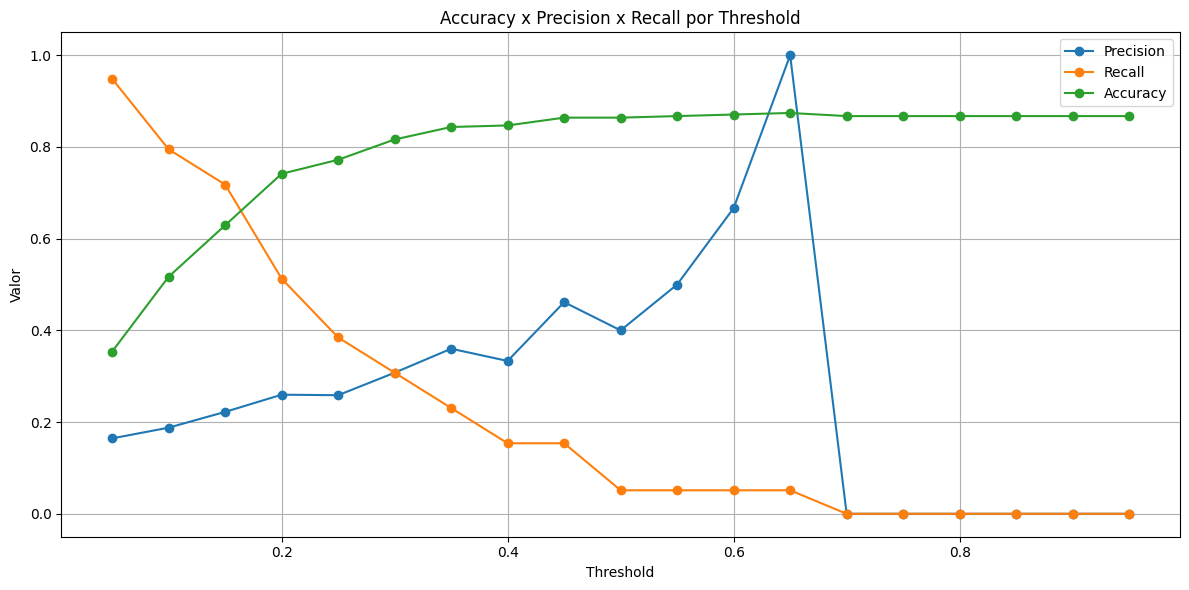

In [27]:
results = []

for thres in np.arange(0.05, 1, 0.05):
    
    y_pred = (bagging_model.predict_proba(X_test_transformed)[:,1]>thres)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    results.append((thres, precision, recall, f1, acc))

results_df = pd.DataFrame(results, columns=["thres", "precision", "recall", "f1", "acc"])


plt.figure(figsize=(12, 6))

plt.plot(results_df["thres"], results_df["precision"], label="Precision", marker='o')
plt.plot(results_df["thres"], results_df["recall"], label="Recall", marker='o')
plt.plot(results_df["thres"], results_df["acc"], label="Accuracy", marker='o')

plt.title("Accuracy x Precision x Recall por Threshold")
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Vamos supor que para esse case, o recall seja a metrica mais importante, pois um possivel gestor deixou claro que seria mais prejudicial prever que uma pessoa não vai sair mas na realidade ela sair do que prever que ela não vai sair e na realidade ela fosse ficar, uma vez que ele quer ter uma conversa com essas pessoas para entender como está a situação delas, então o recall, que mede o quanto o modelo acertou para todos os registros positivos

In [52]:
y_pred = (bagging_model.predict_proba(X_test_transformed)[:,1]>0.25)
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(f"Acc: {accuracy_score(y_test, y_pred)}")

Precision: 0.2911392405063291
Recall: 0.5897435897435898
F1: 0.3898305084745763
Acc: 0.7551020408163265


Nesse caso o modelo está aacertando bem mais para os registros que são verdadeiramente positivos, ou seja, para as pessoas que se demitiram, por consequencia, ele está colocando mais pessoas que não se demitiram na classe dos que se demitiram, sendo isso eficiente pela suposição feita acima

Analisando correlações entre feature e target para possiveis otimizações

Colunas numericas:

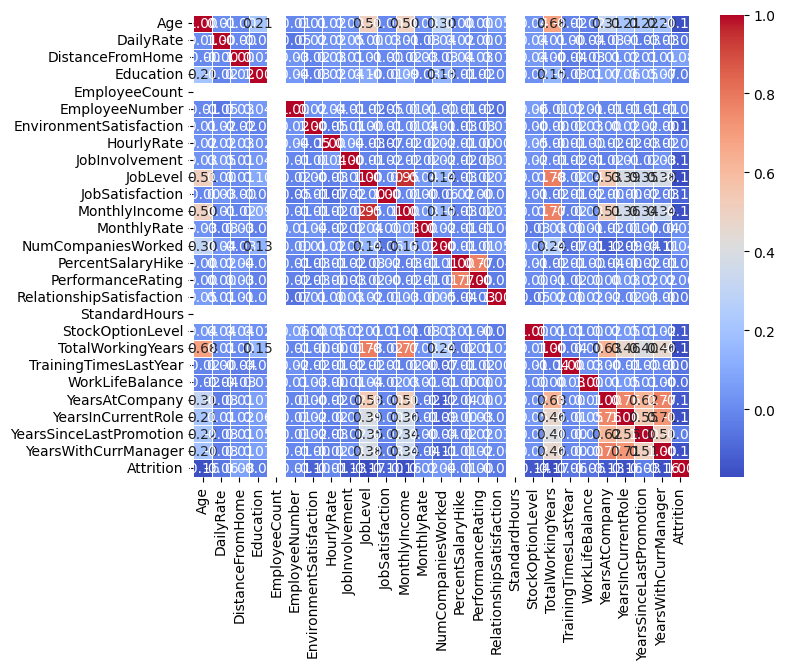

In [24]:
corr_df = pd.concat([X[numeric_features], y], axis=1)
correlation_matrix = corr_df.corr()

# Criando o mapa de calor usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()

Em sua maioria, as correlações são baixas, talvez a utilização de polynomial features seja uma boa para tentar achar relações lineares

## Boosting

In [59]:
from sklearn.ensemble import AdaBoostClassifier

boosting_model = AdaBoostClassifier(
    estimator=bagging_model,
    n_estimators=50
)

boosting_model.fit(X_train_transformed, y_train)
y_pred = boosting_model.predict(X_test_transformed)

c:\Users\vitor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [60]:
#y_pred = (bagging_model.predict_proba(X_test_transformed)[:,1]>0.25)
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(f"Acc: {accuracy_score(y_test, y_pred)}")

Precision: 0.8333333333333334
Recall: 0.1282051282051282
F1: 0.2222222222222222
Acc: 0.8809523809523809


c:\Users\vitor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vitor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vitor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

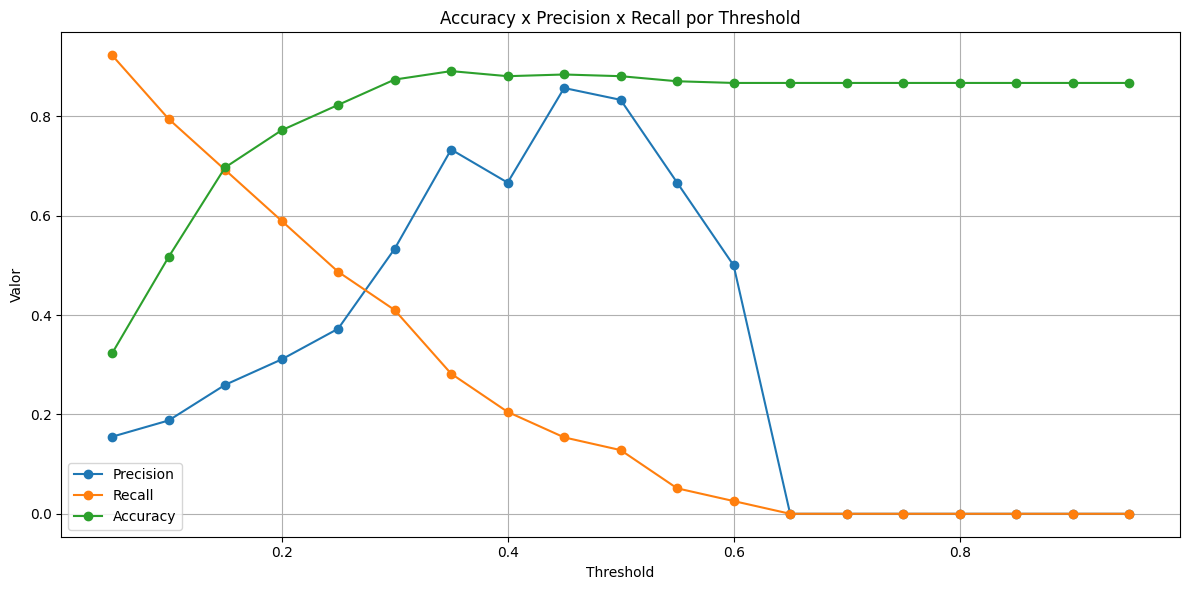

In [69]:
results = []

for thres in np.arange(0.05, 1, 0.05):
    
    y_pred = (boosting_model.predict_proba(X_test_transformed)[:,1]>thres)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    results.append((thres, precision, recall, f1, acc))

results_df = pd.DataFrame(results, columns=["thres", "precision", "recall", "f1", "acc"])


plt.figure(figsize=(12, 6))

plt.plot(results_df["thres"], results_df["precision"], label="Precision", marker='o')
plt.plot(results_df["thres"], results_df["recall"], label="Recall", marker='o')
plt.plot(results_df["thres"], results_df["acc"], label="Accuracy", marker='o')

plt.title("Accuracy x Precision x Recall por Threshold")
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [71]:
y_pred = (boosting_model.predict_proba(X_test_transformed)[:,1]>0.2)
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(f"Acc: {accuracy_score(y_test, y_pred)}")

Precision: 0.3108108108108108
Recall: 0.5897435897435898
F1: 0.40707964601769914
Acc: 0.7721088435374149


## Stacking

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier()

meta_model = bagging_model

stacking_model = StackingClassifier(
    estimators=[
        ('lr', model1),
        ('dt', model2),
        ('knn', model3)
    ],
    final_estimator=meta_model
)

stacking_model.fit(X_train_transformed, y_train)
y_pred = stacking_model.predict(X_test_transformed)

c:\Users\vitor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\vitor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [66]:
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(f"Acc: {accuracy_score(y_test, y_pred)}")

Precision: 0.17777777777777778
Recall: 0.20512820512820512
F1: 0.19047619047619047
Acc: 0.7687074829931972


c:\Users\vitor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vitor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


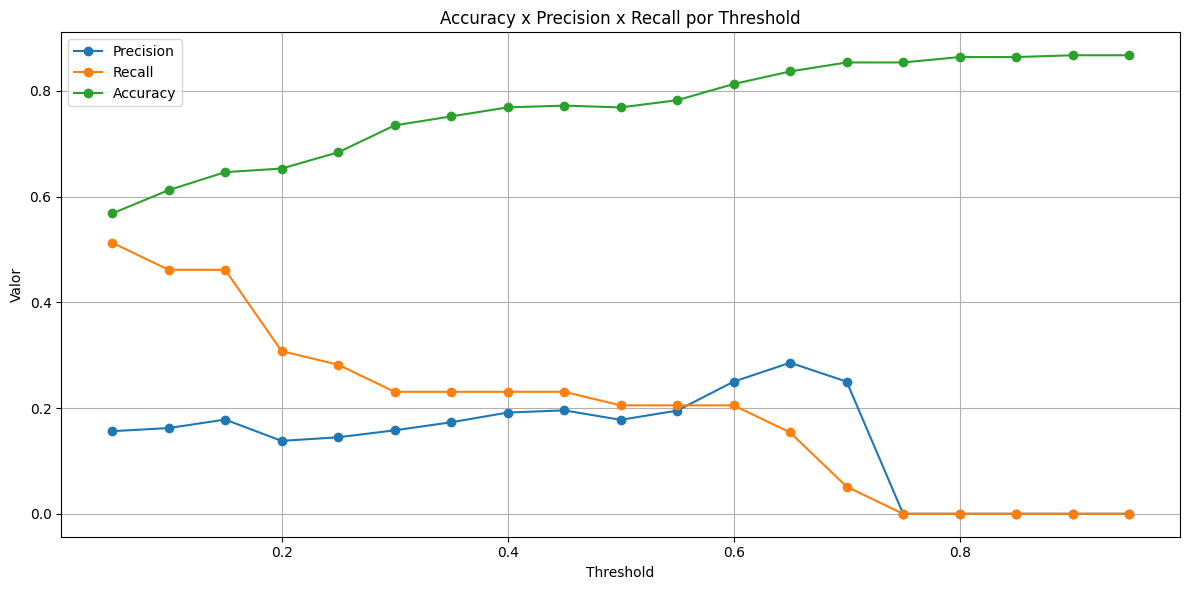

In [72]:
results = []

for thres in np.arange(0.05, 1, 0.05):
    
    y_pred = (stacking_model.predict_proba(X_test_transformed)[:,1]>thres)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    results.append((thres, precision, recall, f1, acc))

results_df = pd.DataFrame(results, columns=["thres", "precision", "recall", "f1", "acc"])


plt.figure(figsize=(12, 6))

plt.plot(results_df["thres"], results_df["precision"], label="Precision", marker='o')
plt.plot(results_df["thres"], results_df["recall"], label="Recall", marker='o')
plt.plot(results_df["thres"], results_df["acc"], label="Accuracy", marker='o')

plt.title("Accuracy x Precision x Recall por Threshold")
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [73]:
y_pred = (stacking_model.predict_proba(X_test_transformed)[:,1]>0.15)
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(f"Acc: {accuracy_score(y_test, y_pred)}")

Precision: 0.1782178217821782
Recall: 0.46153846153846156
F1: 0.2571428571428571
Acc: 0.6462585034013606


# Exemplo real 01 - Regressao com muitas features

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.feature_selection import RFE
from category_encoders import OneHotEncoder, TargetEncoder
from category_encoders import CatBoostEncoder
from sklearn.ensemble import GradientBoostingRegressor

In [7]:
housing = pd.read_csv('DataBase\pricing\housingTrain.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
housing.shape

(1460, 81)

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
# Vendo quantos % de missing tem em cada copluna
missing = housing.isnull().mean() 

cols_to_drop = missing[missing > 0.3].index.to_list()
housing.drop(cols_to_drop, axis=1, inplace=True)

In [14]:
X = housing.drop(columns=['Id', 'SalePrice'])
y = housing['SalePrice']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Como nesse caso temos muitas features, nao podemos fazer essa separação manualmente, entao vamos considerar que as colunas numericas sao aquelas que tem o tipo number, fazendo isso estamos assumindo o risco de classificar algumas features erroneamente, por exemplo, uma feature que representa uma categoria mas tem o tipo number será classificada como numerica

Nesse caso poderiamos olhar para o valor unico(X_train.nunique), por exemplo, se estiver abaixo de X valores unicos, quer dizer que eh categorica, mas fazendo isso estariamos sujeitos a erros também, é aberto a teste

In [17]:
num_features = X_train.select_dtypes(include=['number']).columns
cat_features = X_train.select_dtypes(exclude=['number']).columns

OneHot encoder é pessimo para datasets com muitas colunas

In [46]:
numerical_pipe = Pipeline([
    ('imputernum', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_pipe = Pipeline([
    ('imputercat', SimpleImputer(strategy='most_frequent')),
    ('encoder', CatBoostEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_features),
    ('cat', categorical_pipe, cat_features)
])

In [51]:
from sklearn.linear_model import LinearRegression

model = Pipeline([
    ('preprocessor', preprocessor),
    ('rfe', RFE(RandomForestRegressor(n_estimators=50), n_features_to_select=40)), # Filtrando as features
    ('regressor', GradientBoostingRegressor())
])

In [52]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputernum',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'...
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('rfe',
                 RFE(estimator=RandomForestRegressor(n_estimators=50),
                     n_features_to_select=40)),
                ('regressor', GradientBoostingRegressor())])

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'mse: {mse:.2f}')
print(f'rmse: {rmse:.2f}')
print(f'mape: {mape*100}%')

MAE: 15838.35
mse: 601666390.31
rmse: 24528.89
mape: 9.594735937139367%


Tentando fazer otimizações: 
- Testar outros encoders como WoRRncoder, CatBoostEncoder -> Escolhemos CatBoostEncoder
- Testar modelos ensembles, como GradientBoostingRegressor -> Melhorou
- Filtrar algumas features, uma vez que temos uma quantidade muito grande -> Melhorou

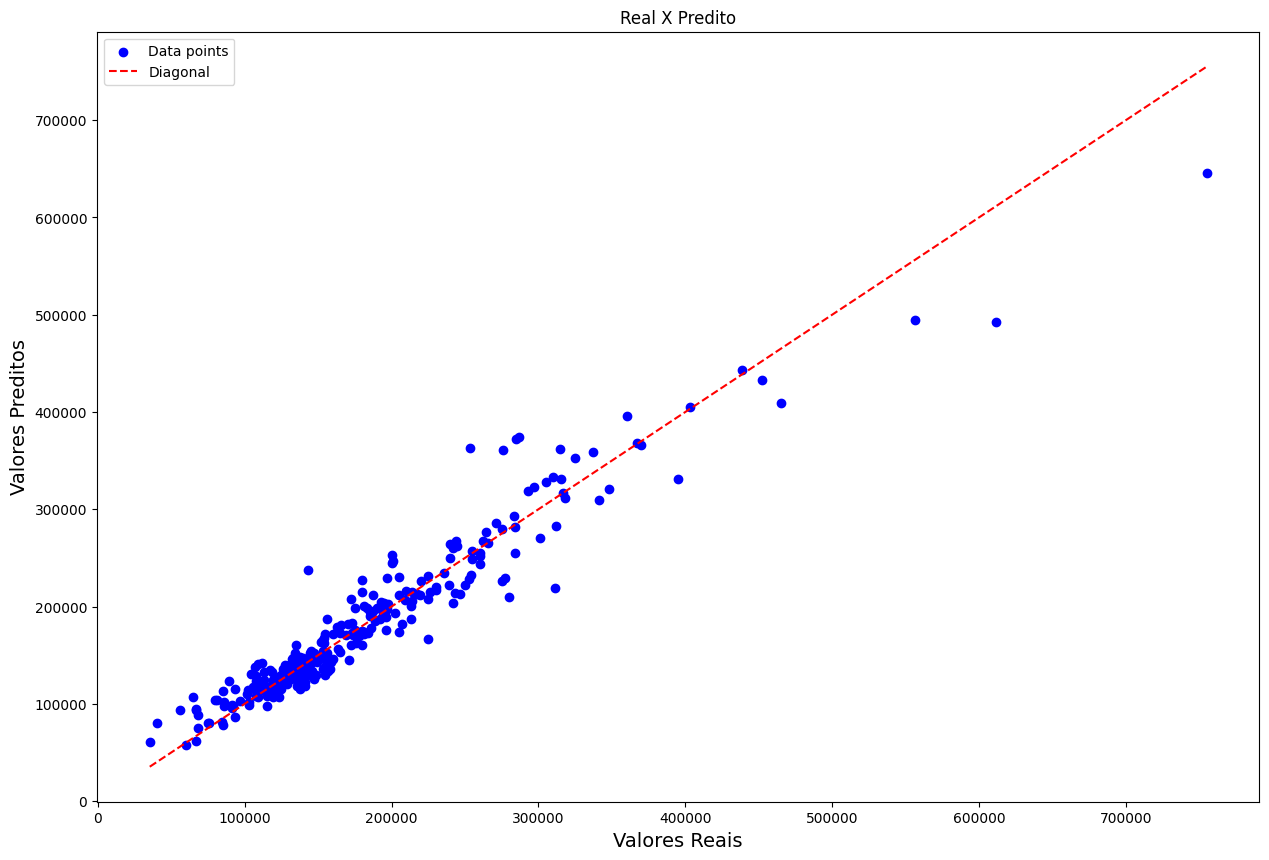

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

plt.scatter(y_test, y_pred, c='blue', label='Data points')

plt.xlabel('Valores Reais', fontsize = 14)
plt.ylabel('Valores Preditos', fontsize = 14)
plt.title('Real X Predito')

# Montando a diagonal
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))

plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Diagonal')

plt.legend()

plt.show()

# Exemplo real 02 - Predição de Dropout de Alunos

In [89]:
import pandas as pd

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)


import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.feature_selection import RFE
from category_encoders import OneHotEncoder, TargetEncoder, OrdinalEncoder
from category_encoders import CatBoostEncoder
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
students = pd.read_csv('DataBase/data.csv', sep=';')
students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [62]:
students.shape

(4424, 37)

## Insights / Tratativas

In [63]:
students.nunique().sort_values()

Scholarship holder                                  2
International                                       2
Gender                                              2
Tuition fees up to date                             2
Daytime/evening attendance\t                        2
Debtor                                              2
Educational special needs                           2
Displaced                                           2
Target                                              3
Marital status                                      6
Application order                                   8
Inflation rate                                      9
Unemployment rate                                  10
Curricular units 2nd sem (without evaluations)     10
GDP                                                10
Curricular units 1st sem (without evaluations)     11
Previous qualification                             17
Course                                             17
Application mode            

Nesse caso, por ser um dataset com uma qunatidade mwediana de colunas, poderiamos dividir na mao, uma vez que se fizessemos um corte nos dados, poderiamos excluir certar colunas como curso, que tem 17 valores unicos mas é categorico. Se fizessemos por tipo tambem estaremos classificando algumas variaveis categoricas que tem sua representação numericamente

In [70]:
students.Target.value_counts()

Target
0    2209
1    1421
Name: count, dtype: int64

Nesse caso, so queremos analisar os alunos que se graduaram e que desistiram, entao podemos dropar todos os registros que enrolled, aqueles que estão estudando ainda

In [66]:
students = students[students['Target'] != 'Enrolled']

In [69]:
students['Target'] = students['Target'].map({
    'Graduate': 0,
    'Dropout': 1
})

C:\Users\vitor\AppData\Local\Temp\ipykernel_4728\551056104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students['Target'] = students['Target'].map({


In [71]:
students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [72]:
students['Unemployment rate'] = students['Unemployment rate']/100
students['Inflation rate'] = students['Inflation rate']/100

C:\Users\vitor\AppData\Local\Temp\ipykernel_4728\4156082204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students['Unemployment rate'] = students['Unemployment rate']/100
C:\Users\vitor\AppData\Local\Temp\ipykernel_4728\4156082204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students['Inflation rate'] = students['Inflation rate']/100


Vendo se existe alguma relação entre o status de relacionamento e o dropout

In [74]:
students.groupby('Marital status')['Target'].mean()

Marital status
1    0.370116
2    0.547401
3    0.500000
4    0.560000
5    0.500000
6    0.800000
Name: Target, dtype: float64

In [75]:
students.groupby('Gender')['Target'].mean()

Gender
0    0.302394
1    0.561249
Name: Target, dtype: float64

In [76]:
students.groupby('Debtor')['Target'].mean()

Debtor
0    0.344731
1    0.755448
Name: Target, dtype: float64

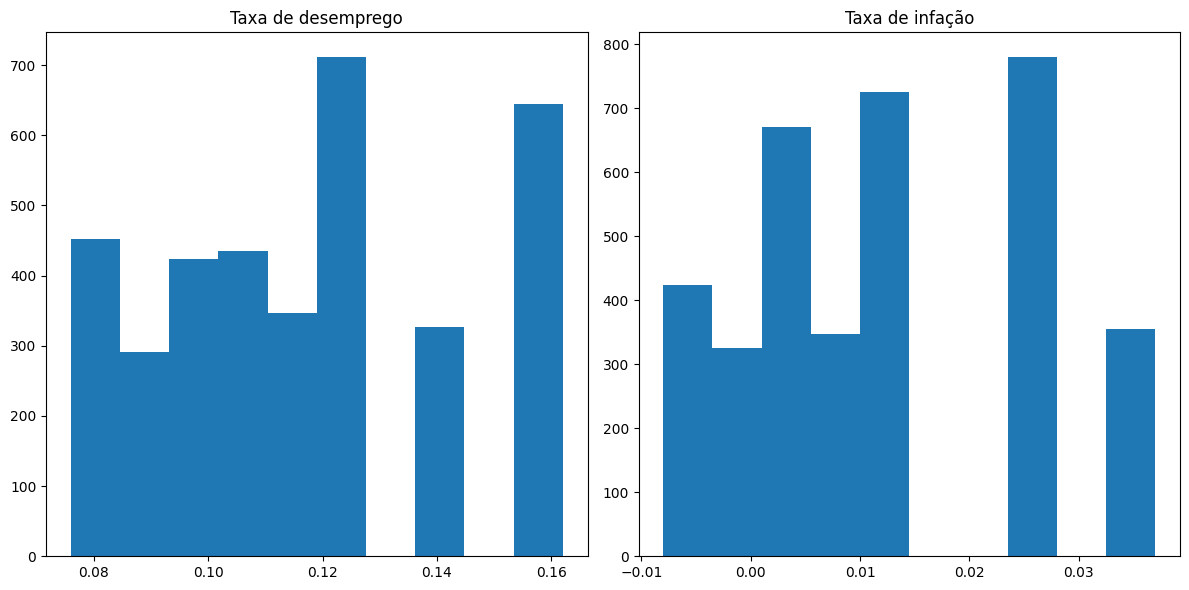

In [77]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))

plt.sca(axes[0])
plt.hist(students['Unemployment rate'])
plt.title('Taxa de desemprego')

plt.sca(axes[1])
plt.hist(students['Inflation rate'])
plt.title('Taxa de infação')

plt.tight_layout()
plt.show()

## Modelagem de machine Learning

In [78]:
students.rename(columns={'Daytime/evening attendance\t': 'DaytimeEveningAttendance'}, inplace=True)


C:\Users\vitor\AppData\Local\Temp\ipykernel_4728\2579556261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students.rename(columns={'Daytime/evening attendance\t': 'DaytimeEveningAttendance'}, inplace=True)


In [79]:
numerical_features = ['GDP',
                      'Gender',
                      'Displaced',
                      'International',
                      'Scholarship holder',
                      'Curricular units 1st sem (without evaluations)',
                      'Curricular units 1st sem (credited)',
                      'Curricular units 1st sem (evaluations)',
                      'Curricular units 1st sem (enrolled)', 
                      'Curricular units 1st sem (approved)',
                      'Curricular units 1st sem (grade)',
                      'Curricular units 2nd sem (evaluations)',
                      'Curricular units 2nd sem (enrolled)',
                      'Curricular units 2nd sem (credited)', 
                      'Curricular units 2nd sem (approved)',
                      'Curricular units 2nd sem (grade)', 
                      'Curricular units 2nd sem (without evaluations)', 
                      'Age at enrollment', 
                      'Tuition fees up to date',
                      'Debtor',
                      'Previous qualification (grade)', 
                      'Educational special needs',
                      'Admission grade',  
                      'DaytimeEveningAttendance'
                     ]

rate_features = ['Inflation rate', 'Unemployment rate']

ordinal_features = ['Application order']

categorical_features = ["Marital status",
                        "Mother's qualification", 
                        "Mother's occupation", 
                        "Father's qualification", 
                        "Father's occupation",
                        'Nacionality',
                        'Course', 
                        'Previous qualification', 
                        'Application mode', 
                       ]

In [83]:
for col in categorical_features:
    students[col] = students[col].astype('category')

for col in ordinal_features:
    students[col] = students[col].astype('category')

In [84]:
X = students.drop(columns=['Target'])
y = students['Target']

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [90]:
numerical_pipe = Pipeline(steps=[
    ('scaler', StandardScaler())
])

rate_pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

ordinal_pipe = Pipeline(steps=[
    ('encoder_ordinal', OrdinalEncoder())
])

categorical_pipe = Pipeline(steps=[
    ('cat_encoder', TargetEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipe, numerical_features),
    ('rate', rate_pipe, rate_features),
    ('ordinal', ordinal_pipe, ordinal_features),
    ('cat', categorical_pipe, categorical_features),
])

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classificador', GradientBoostingClassifier(n_estimators=50, random_state=42))
])

In [93]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['GDP', 'Gender', 'Displaced',
                                                   'International',
                                                   'Scholarship holder',
                                                   'Curricular units 1st sem '
                                                   '(without evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(credited)',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)',
                                                   'Curricular u...
                                                                   OrdinalEncoder())]),
                                                  ['Application order']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   TargetEncoder())]),
                                                  ['Marital status',
                                                   "Mother's qualification",
                                                   "Mother's occupation",
                                                   "Father's qualification",
                                                   "Father's occupation",
                                                   'Nacionality', 'Course',
                                                   'Previous qualification',
                                                   'Application mode'])])),
                ('classificador',
                 GradientBoostingClassifier(n_estimators=50, random_state=42))])

In [96]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, f1_score, recall_score

y_pred = model.predict(X_test)

print(f'Acurracia: {accuracy_score(y_test, y_pred)}')
print(f'F1-score: {f1_score(y_test, y_pred)}')
print(f'Preision: {precision_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')


Acurracia: 0.9022038567493113
F1-score: 0.8652751423149905
Preision: 0.912
recall: 0.8231046931407943


In [100]:
students['Target'].value_counts()

Target
0    2209
1    1421
Name: count, dtype: int64

In [101]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Matriz de confusão: 
 [[427  22]
 [ 49 228]]


## Trabalhando com feature importances

In [106]:
classificador = model.named_steps['classificador']

feature_importances = classificador.feature_importances_

all_features = X.columns

# PEgando as features mais importantes
feature_importance_df = pd.DataFrame({
    'feature': all_features,
    'importance': feature_importances
})

feature_importance_df.sort_values(by='importance', ascending=False)

,feature,importance
14,Educational special needs,0.722865
18,Scholarship holder,0.082606
8,Mother's qualification,0.031440
9,Father's qualification,0.027988
12,Admission grade,0.025971
15,Debtor,0.017971
33,Unemployment rate,0.017454
4,DaytimeEveningAttendance,0.013260
22,Curricular units 1st sem (enrolled),0.008338
30,Curricular units 2nd sem (approved),0.007536


Para testar se essas features são realmente importantes para o modelo, vamos tentar rodar -Para cada feature- o modelo com valores randomicos, se a predição piorar, significa que essa feature realmente é importante para o modelo. Caso o poder de predição do modelo não mude, quer dizer que essa feature não é de grande importancia para o modelo

In [104]:
feature_importances = {}

features = X_test.columns.tolist()

baseline_metric = accuracy_score(y_test, y_pred)

for feature in features:
    
    X_test_copy = X_test.copy()
    
    X_test_copy[feature] = np.random.permutation(X_test_copy[feature])
    
    y_pred_permuted = model.predict(X_test_copy)
    
    permuted_metric = accuracy_score(y_test, y_pred_permuted)
    
    feature_importances[feature] = baseline_metric - permuted_metric
    
    

De cima pra baixo temos as features que mais tiveram alterações no modelo, caso tenhamos delta negativo, quer diz que o modelo teve uma performace melhor sem elas

In [105]:
pd.Series(feature_importances).sort_values(ascending=False)

Curricular units 2nd sem (approved)               0.252066
Tuition fees up to date                           0.028926
Curricular units 2nd sem (enrolled)               0.016529
Curricular units 1st sem (enrolled)               0.012397
Course                                            0.009642
Curricular units 2nd sem (credited)               0.008264
Curricular units 1st sem (approved)               0.008264
Application mode                                  0.005510
Admission grade                                   0.004132
Scholarship holder                                0.004132
Curricular units 2nd sem (grade)                  0.004132
Father's occupation                               0.002755
Father's qualification                            0.002755
Inflation rate                                    0.002755
Curricular units 1st sem (credited)               0.001377
Debtor                                            0.001377
Age at enrollment                                 0.0013